In [477]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random as random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(pd.read_csv('../DataSets/V2_MASTER_PhonesmartdataAll_CCI_AdvStats.csv'))


1. Check Data quality

Check some metrics of dataframe and if the data has null values

In [479]:
df.describe()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
count,548.000000,548.000000,543.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,1.000000,1.000000
mean,2020.711679,29.677007,1.788214,3.237226,46.985401,50.470803,181.753650,49.394161,942.567275,841.467643,827.116332,925.624053
std,0.731187,8.828638,0.435179,1.741609,11.955576,25.344736,177.331993,36.985764,195.525323,172.026277,NaN,NaN
min,2020.000000,16.000000,1.000000,0.000000,20.000000,0.000000,0.000000,32.000000,521.500000,503.000000,827.116332,925.624053
25%,2020.000000,24.000000,2.000000,2.000000,39.000000,33.000000,0.000000,32.000000,823.408271,730.852768,827.116332,925.624053
50%,2021.000000,28.500000,2.000000,3.000000,47.000000,49.000000,169.500000,32.000000,903.227792,796.977778,827.116332,925.624053
75%,2021.000000,34.000000,2.000000,4.000000,55.000000,67.000000,297.000000,32.000000,1012.179167,886.148194,827.116332,925.624053
max,2022.000000,101.000000,3.000000,10.000000,77.000000,140.000000,1157.000000,272.000000,2125.150000,1896.975000,827.116332,925.624053


Check datatypes 

In [480]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            548 non-null    int64  
 1   Age                             548 non-null    int64  
 2   GenderNum                       543 non-null    float64
 3   AutismQuotient                  548 non-null    int64  
 4   STAI                            548 non-null    int64  
 5   BRIEF_Total                     548 non-null    int64  
 6   Device                          548 non-null    object 
 7   DailyAvgMins                    548 non-null    int64  
 8   DailyAvePickups                 548 non-null    int64  
 9   VS_RT_correct_Conjunction       548 non-null    float64
 10  VS_RT_correct_Single            548 non-null    float64
 11  Mean_VS_RT_correct_Single       1 non-null      float64
 12  Mean_VS_RT_correct_Conjunction  1 no

We fill NAN with zeros

In [481]:
df = df.fillna(0)
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500,827.116332,925.624053
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500,0.000000,0.000000
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000,0.000000,0.000000
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333,0.000000,0.000000
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194,0.000000,0.000000
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583,0.000000,0.000000
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167,0.000000,0.000000
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083,0.000000,0.000000


We check if the data has null values after we fill it with zeros


In [482]:
df.isnull().sum()

Year                              0
Age                               0
GenderNum                         0
AutismQuotient                    0
STAI                              0
BRIEF_Total                       0
Device                            0
DailyAvgMins                      0
DailyAvePickups                   0
VS_RT_correct_Conjunction         0
VS_RT_correct_Single              0
Mean_VS_RT_correct_Single         0
Mean_VS_RT_correct_Conjunction    0
dtype: int64

2. Data Relatonship/Distribution:

We can see from the plot that 416 people are gender 2, 121 people gender 1, 6 people are gender 3 and are 5 people undefined

GenderNum
0.0      5
1.0    121
2.0    416
3.0      6
Name: DailyAvePickups, dtype: int64


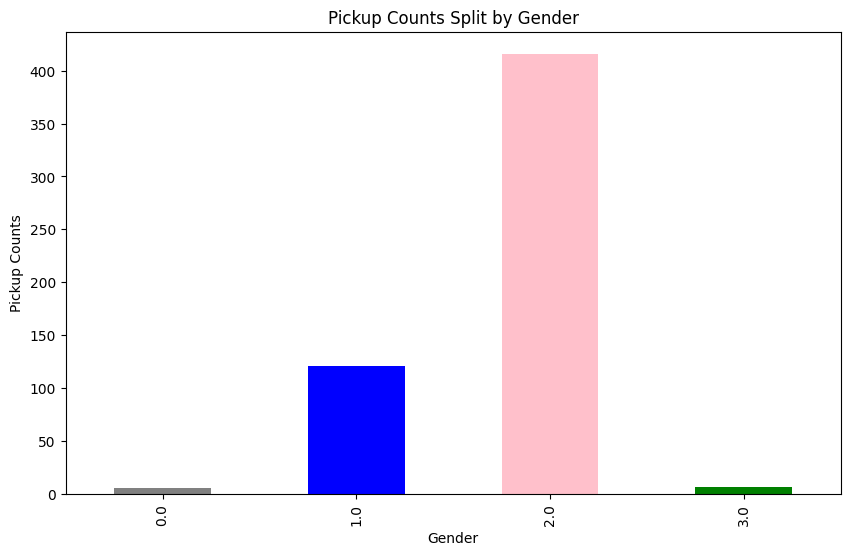

In [483]:
frequency_table = df.groupby('GenderNum')['DailyAvePickups'].count()
print(frequency_table)

# Create a bar plot
frequency_table.plot(kind='bar', figsize=(10, 6),color=['gray','blue', 'pink', 'green'])


plt.xlabel('Gender')
plt.ylabel('Pickup Counts')
plt.title('Pickup Counts Split by Gender')
plt.show()

From boxplot and distribution we can acknowledge that most of DailyAvgMins were measured from 100 to 300

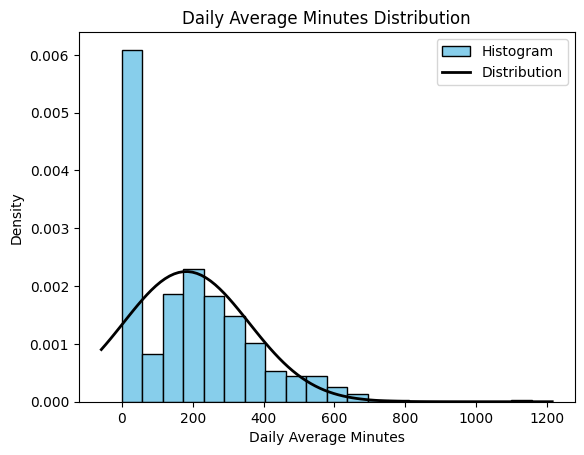

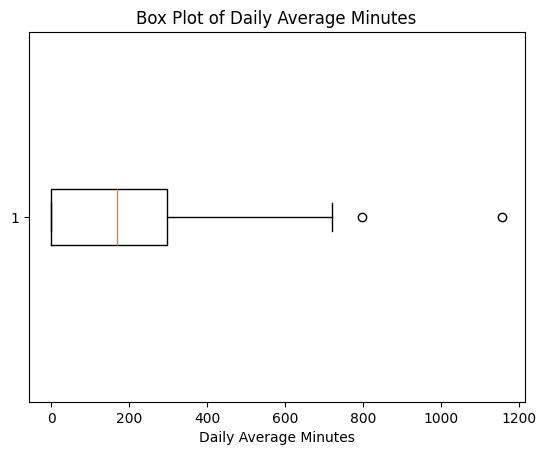

In [484]:

# Frequency table
frequency_table_daily_minutes = pd.cut(df['DailyAvgMins'], bins=5).value_counts()

# Plotting the histogram
plt.hist(df['DailyAvgMins'], bins=20, color='skyblue', edgecolor='black', density=True, label='Histogram')

# Plotting the PDF (line of distribution)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['DailyAvgMins']), np.std(df['DailyAvgMins']))
plt.plot(x, p, 'k', linewidth=2, label='Distribution')

# Adding labels and legend
plt.title('Daily Average Minutes Distribution')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting 2 - Box plot
plt.boxplot(df['DailyAvgMins'], vert=False)
plt.title('Box Plot of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.show()


From scatterplot we can understand that most of people aged between around 15 to 40 had quickiest response time
Moreover, fastest gender was number 1 and had average response time lesser than 900 

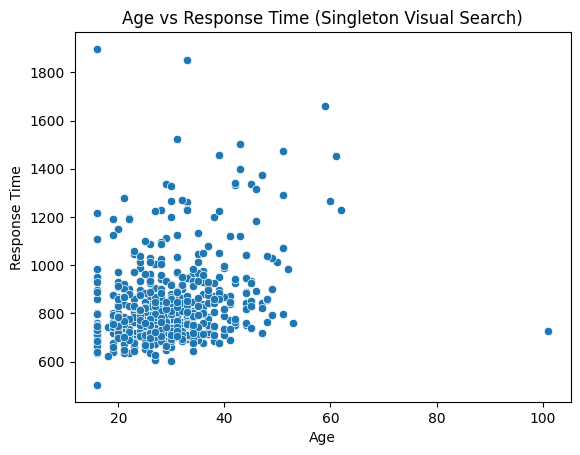

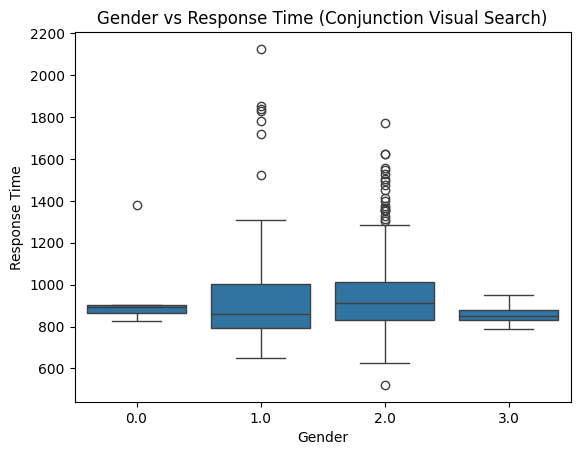

In [485]:
import seaborn as sns
df_age = df[df['Age']!=0]

# Participant’s age and their Response time on singleton visual search
sns.scatterplot(x='Age', y='VS_RT_correct_Single', data=df_age)
plt.title('Age vs Response Time (Singleton Visual Search)')
plt.xlabel('Age')
plt.ylabel('Response Time')
plt.show()

# Participant’s gender and their Response time on conjunction visual search
sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df_age)
plt.title('Gender vs Response Time (Conjunction Visual Search)')
plt.xlabel('Gender')
plt.ylabel('Response Time')
plt.show()


3. Correlaton  Check:  Produce  a  bivariate  correlation  table  between  Age,  STAI, 
BRIEF_Total, DailyAvgMins and VS_RT_correct_Single. 

In [486]:
# Bivariate correlation table
correlation_table = df[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


,Age,STAI,BRIEF_Total,DailyAvgMins,VS_RT_correct_Single
Age,1.000000,-0.074555,-0.034091,-0.048672,0.286206
STAI,-0.074555,1.000000,0.632384,-0.011529,-0.090532
BRIEF_Total,-0.034091,0.632384,1.000000,0.026128,-0.000901
DailyAvgMins,-0.048672,-0.011529,0.026128,1.000000,-0.120915
VS_RT_correct_Single,0.286206,-0.090532,-0.000901,-0.120915,1.000000


Correlation of Age is only positive with VS_RT_correct_Single, STAI is corelated with BRIEF_Total and DailyAvgMins

In [487]:
# Ordinary Least Squares regression
# Define response variable
y = df['VS_RT_correct_Single']

# Define explanatory variables
x = df[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins']]

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.104
Model:                              OLS   Adj. R-squared:                  0.097
Method:                   Least Squares   F-statistic:                     15.71
Date:                  Mon, 04 Dec 2023   Prob (F-statistic):           3.56e-12
Time:                          14:06:22   Log-Likelihood:                -3568.0
No. Observations:                   548   AIC:                             7146.
Df Residuals:                       543   BIC:                             7167.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          758.8115     39.545     19.188      0.000     681.131     836.492
Age              5.3433      0.795      6.722      0.000       3.782       6.905
STAI            -1.8836      0.757     -2.488      0.013      -3.371      -0.397
BRIEF_Total      0.6390      0.356      1.793      0.074      -0.061       1.339
DailyAvgMins    -0.1082      0.040     -2.739      0.006      -0.186      -0.031
==============================================================================
Omnibus:                      258.610   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.169
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      10.242   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is significant correlation between all of IV's, but only Age and BRIEF_total have positive correlation to DV.
Around 10.4% of the variability in the DV is explained by IV - R-squared coefficient

4. Linear regression


 ------- regression_results -------
Mean Squared Error: 15060.473769553386
Deterministic Coefficient (R-squared): -0.0503010020181498




C:\Users\adamm\AppData\Local\Temp\ipykernel_15116\481482979.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = model.predict(scaler.transform(X))


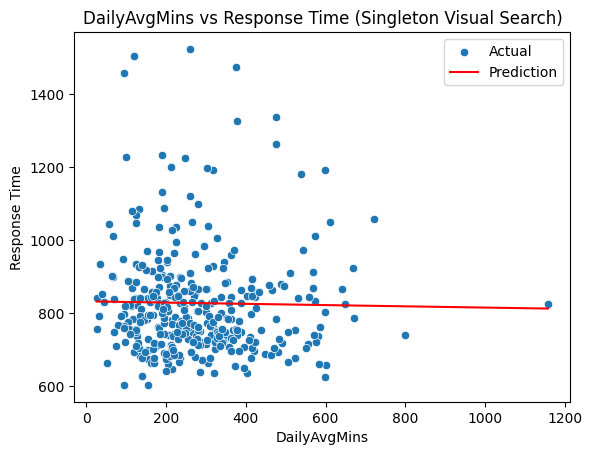

In [488]:
df_filtered = df[df['DailyAvgMins'] != 0]

def regression(df):
    # Select independent variables
    X = df[['DailyAvgMins']]  # Use double brackets to create a DataFrame
    y = df['VS_RT_correct_Single']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Deterministic Coefficient (R-squared): {r2}")
    print('\n')

    # Make predictions on the entire dataset for visualization
    df['Prediction'] = model.predict(scaler.transform(X))

    # Plot the results
    sns.scatterplot(x='DailyAvgMins', y='VS_RT_correct_Single', data=df, label='Actual')
    sns.lineplot(x='DailyAvgMins', y='Prediction', data=df, color='red', label='Prediction')
    plt.title('DailyAvgMins vs Response Time (Singleton Visual Search)')
    plt.xlabel('DailyAvgMins')
    plt.ylabel('Response Time')
    plt.legend()
    plt.show()

print('\n ------- regression_results -------')
regression(df_filtered)

The Mean Squared Error is quite high and the negative R-squared suggests that the model might not well explain variance dependent variable so it will badly predict new data.

5. Multiple  Regression


 ------- regression_results -------
Mean Squared Error: 18598.0032830738
Deterministic Coefficient (R-squared): 0.07396807040583087


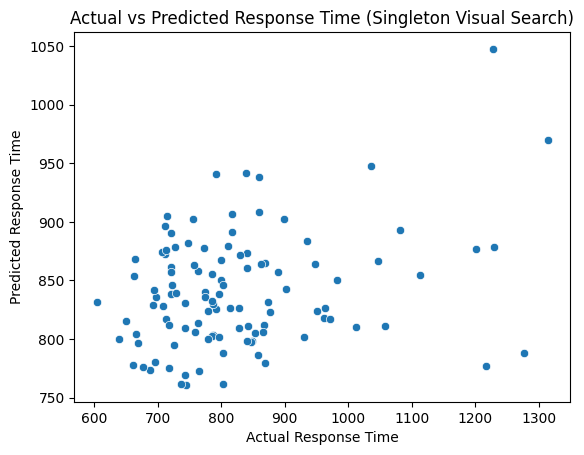

In [489]:

def regression_and_SVM_time_prediction(df):
    # Select independent variables
    X = df[['Age', 'GenderNum','STAI','DailyAvePickups','BRIEF_Total']]
    y = df['VS_RT_correct_Single']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Deterministic Coefficient (R-squared): {r2}")

    # Make predictions on the entire dataset for visualization
    df['Prediction'] = model.predict(scaler.transform(X))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Response Time (Singleton Visual Search)')
    plt.xlabel('Actual Response Time')
    plt.ylabel('Predicted Response Time')
    plt.show()

print('\n ------- regression_results -------')
regression_and_SVM_time_prediction(df)

The Mean Squared Error is rather high and the R-squared is positive this suggests that the model might accurately explain variance of DV and predict new data well.


Scenario 1

We define new data frame where we group people accordingly

In [490]:
df1 = df
# Define age groups
age_bins = [0, 30, 50, float('inf')]
age_labels = ['a', 'b', 'c']
df1['AgeGroup'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

# Define usage groups
usage_bins = [0, 300, 899, float('inf')]
usage_labels = ['a', 'b', 'c']
df1['UsageGroup'] = pd.cut(df1['DailyAvgMins'], bins=usage_bins, labels=usage_labels, right=False)

# Group by Age Group and Usage Group
grouped_df = df1.groupby(['AgeGroup', 'UsageGroup']).agg({
    'Age': 'count',  # Count of participants
    'DailyAvgMins': 'mean',  # Mean of DailyAvgMins
    'VS_RT_correct_Single': 'mean'  # Mean of VS_RT_mean
}).reset_index()

print("Grouped DataFrame:")
grouped_df.rename(columns = {'Age':'GroupCount'}, inplace = True)
grouped_df

Grouped DataFrame:


C:\Users\adamm\AppData\Local\Temp\ipykernel_15116\1488265964.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df1.groupby(['AgeGroup', 'UsageGroup']).agg({


,AgeGroup,UsageGroup,GroupCount,DailyAvgMins,VS_RT_correct_Single
0,a,a,228,97.039474,812.463958
1,a,b,72,424.000000,787.770776
2,a,c,0,NaN,NaN
3,b,a,172,108.651163,882.857019
4,b,b,63,413.238095,837.589889
5,b,c,1,1157.000000,825.891528
6,c,a,11,63.000000,1113.022268
7,c,b,1,376.000000,1474.283333
8,c,c,0,NaN,NaN


Fill NAN with zeros

In [491]:
grouped_df['DailyAvgMins'] = grouped_df['DailyAvgMins'].fillna(0)
grouped_df['VS_RT_correct_Single'] = grouped_df['VS_RT_correct_Single'].fillna(0)
grouped_df

,AgeGroup,UsageGroup,GroupCount,DailyAvgMins,VS_RT_correct_Single
0,a,a,228,97.039474,812.463958
1,a,b,72,424.000000,787.770776
2,a,c,0,0.000000,0.000000
3,b,a,172,108.651163,882.857019
4,b,b,63,413.238095,837.589889
5,b,c,1,1157.000000,825.891528
6,c,a,11,63.000000,1113.022268
7,c,b,1,376.000000,1474.283333
8,c,c,0,0.000000,0.000000


In [492]:
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


for group in age_labels:
    data = grouped_df[grouped_df['AgeGroup'] == group]['VS_RT_correct_Single']
    var_VS_RT_correct_Single = np.var(data.values)
    print(f"For {group} group - VS_RT_correct_Single Vairance: {var_VS_RT_correct_Single}")

For a group - VS_RT_correct_Single Vairance: 142365.58122381754
For b group - VS_RT_correct_Single Vairance: 603.4479971700736
For c group - VS_RT_correct_Single Vairance: 393648.83022689394


From diffrent vairances of VS_RT_correct_Single we can acknowledge that factors are independent and we can investigate data further

In [493]:
# Shapiro-Wilk test for normality
for group in age_labels:
    data = grouped_df[grouped_df['AgeGroup'] == group]['VS_RT_correct_Single']
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk test for {group} group - Statistic: {stat}, p-value: {p_value}")



Shapiro-Wilk test for a group - Statistic: 0.7727731466293335, p-value: 0.05103338848440808
Shapiro-Wilk test for b group - Statistic: 0.8962570428848267, p-value: 0.37368468895865004
Shapiro-Wilk test for c group - Statistic: 0.9202411770820618, p-value: 0.45318483552791666


For group 'a' may be different from normality, but its not strong evidence and for groups 'b' and 'c', there is no strong evidence of difference from normal distribution.


Group a - Shapiro-Wilk Statistic: 0.7727731466293335, p-value: 0.05103338848440808


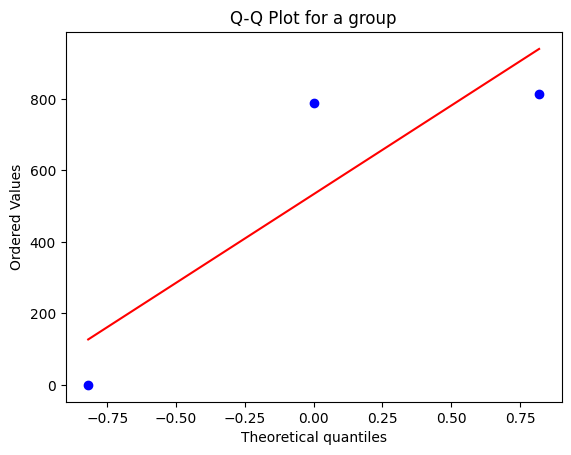

Group b - Shapiro-Wilk Statistic: 0.8962570428848267, p-value: 0.37368468895865004


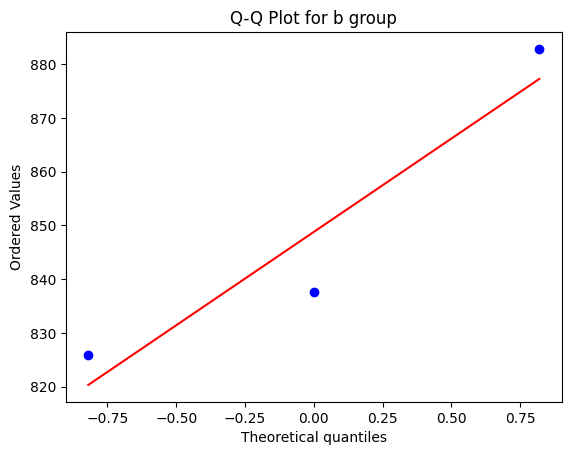

Group c - Shapiro-Wilk Statistic: 0.9202411770820618, p-value: 0.45318483552791666


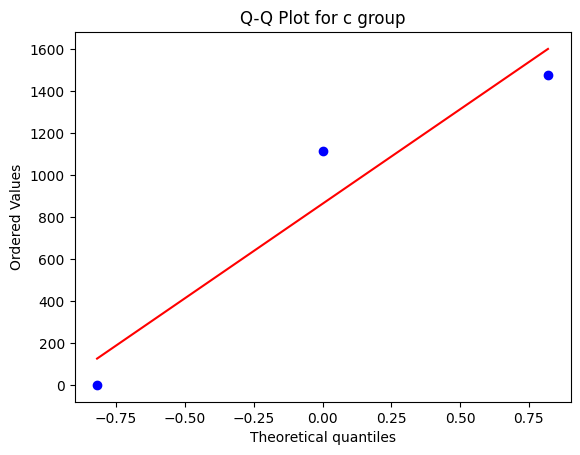

In [494]:
# Q-Q plot for normality

for group in age_labels:
    data = grouped_df[grouped_df['AgeGroup'] == group]['VS_RT_correct_Single']
    plt.figure()
    stats.probplot(data, dist='norm', plot=plt)

    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(data)

    print(f'Group {group} - Shapiro-Wilk Statistic: {stat}, p-value: {p_value}')

    plt.title(f'Q-Q Plot for {group} group')
    plt.show()

Our plot confirm that group a if further from diagonal line than group b and c as they are closer to normal distribution

we drop useless groups with zeros for test

In [495]:
grouped_df_filtered = grouped_df.drop(grouped_df.index[2])
grouped_df_filtered = grouped_df_filtered.drop(grouped_df_filtered.index[7])
grouped_df_filtered

,AgeGroup,UsageGroup,GroupCount,DailyAvgMins,VS_RT_correct_Single
0,a,a,228,97.039474,812.463958
1,a,b,72,424.000000,787.770776
3,b,a,172,108.651163,882.857019
4,b,b,63,413.238095,837.589889
5,b,c,1,1157.000000,825.891528
6,c,a,11,63.000000,1113.022268
7,c,b,1,376.000000,1474.283333


In [496]:
from scipy.stats import f_oneway

# Example data
group_a = grouped_df[grouped_df['AgeGroup'] == 'a']['VS_RT_correct_Single']
group_b = grouped_df[grouped_df['AgeGroup'] == 'b']['VS_RT_correct_Single']
group_c = grouped_df[grouped_df['AgeGroup'] == 'c']['VS_RT_correct_Single']

# Perform one-way ANOVA
anova_result = f_oneway(group_a, group_b, group_c)

# Display the result
print("One-way ANOVA result:", anova_result)


One-way ANOVA result: F_onewayResult(statistic=0.3874264189981094, pvalue=0.694630987320687)


P value is more than 5%, normal distibution is not strongly violated and vairance is also different from each group. To conclude there isn't significant evidence for response time to be different age groups.

In [497]:
# Post-Hoc Tests (e.g., Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a grouping variable for post-hoc tests
grouping_variable = df['AgeGroup']

# Tukey's HSD
tukey_results = pairwise_tukeyhsd(df['VS_RT_correct_Single'], grouping_variable)
print("\nTukey's HSD Results:")
print(tukey_results)



Tukey's HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     a      b   63.994   0.0  30.6058  97.3822   True
     a      c 336.5898   0.0 223.6223 449.5572   True
     b      c 272.5957   0.0 159.0407 386.1508   True
-----------------------------------------------------


All group comparisons resulted in rejecting the null hypothesis. There are significant differences in the mean values of 'VS_RT_correct_Single' i all three groups.

Scenario 2:

In [498]:
df = pd.DataFrame(pd.read_csv('../DataSets/V2_MASTER_PhonesmartdataAll_CCI_AdvStats.csv'))
df = df.fillna(0)
df.sort_values(by='VS_RT_correct_Single', ascending=False, inplace=True)
df.rename(columns={'VS_RT_correct_Conjunction': 'VS_RT_Before', 'VS_RT_correct_Single': 'VS_RT_After'}, inplace=True)
df['Brain_Training'] = np.random.choice(['Trained', 'Non-Trained'], size=len(df))
df


,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction,Brain_Training
190,2021,16,1.0,2,24,12,iphone,0,32,1840.291667,1896.975000,0.0,0.0,Non-Trained
488,2020,33,1.0,3,42,49,iphone,0,32,2125.150000,1849.425000,0.0,0.0,Trained
494,2020,59,1.0,4,51,65,iphone,0,32,1851.734083,1659.979306,0.0,0.0,Trained
7,2021,31,2.0,1,43,44,iPhone,259,54,1015.666667,1524.733333,0.0,0.0,Trained
171,2021,43,2.0,0,52,43,iPhone,119,57,1625.691667,1504.225000,0.0,0.0,Trained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2020,27,2.0,4,30,34,Android,141,32,720.875417,628.811944,0.0,0.0,Non-Trained
423,2020,18,2.0,3,47,63,iPhone,598,32,660.135833,625.043750,0.0,0.0,Trained
9,2021,27,1.0,3,32,4,iPhone,155,97,650.187500,604.390000,0.0,0.0,Non-Trained
242,2020,30,2.0,3,54,27,iPhone,94,32,625.630917,604.172889,0.0,0.0,Non-Trained


In [499]:
age_labels = [1,2,3]
for group in age_labels:
    data = df[df['GenderNum'] == group]['VS_RT_After']
    var_daily_avg_mins = np.var(data.values)
    print(f"For {group} group - Vairance: {var_daily_avg_mins}")

For 1 group - Vairance: 45177.513399931864
For 2 group - Vairance: 25265.190968311257
For 3 group - Vairance: 1287.2736493079578


From diffrent vairances of VS_RT_After we can acknowledge that factors are independent and we can investigate data further

In [500]:
# Shapiro-Wilk test for normality
for group in age_labels:
    data = df[df['GenderNum'] == group]['VS_RT_After']
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk test for {group} group - Statistic: {stat}, p-value: {p_value}")


Shapiro-Wilk test for 1 group - Statistic: 0.7045415639877319, p-value: 2.7640079285139e-14
Shapiro-Wilk test for 2 group - Statistic: 0.852109968662262, p-value: 2.3444242434192304e-19
Shapiro-Wilk test for 3 group - Statistic: 0.7695814967155457, p-value: 0.030761249363422394


For Group 1 and Group 2, the p-value is very close to zero. Group 3 is also smaller than p < 0.05 so we reject the null hypothesis. In all three groups we can reject null hypothesis he data in Group 2 is not normally distributed

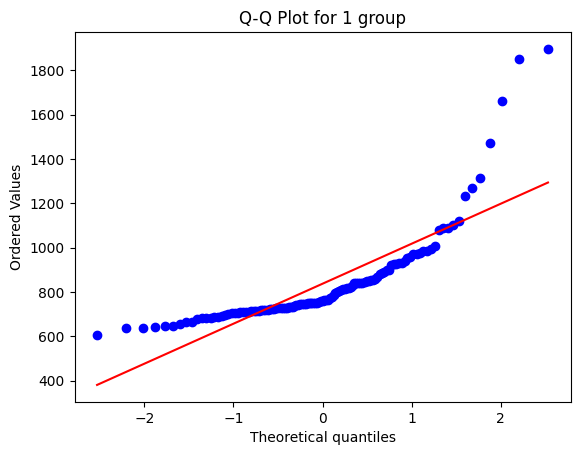

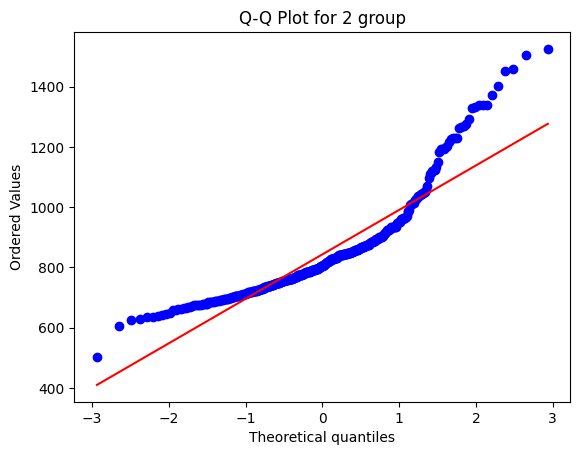

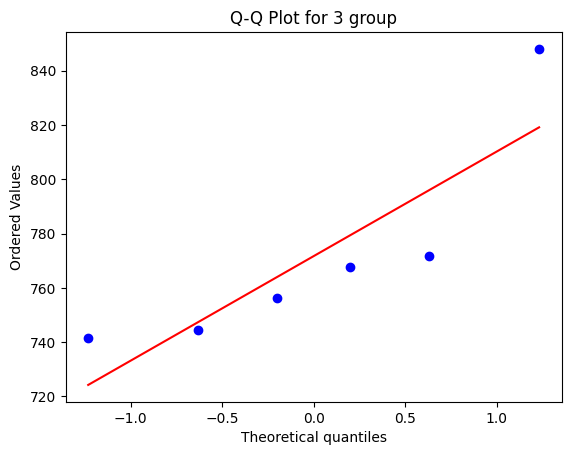

In [501]:
# Q-Q plot for normality
for gennum in age_labels:
    data = df[df['GenderNum'] == gennum]['VS_RT_After']
    plt.figure()
    stats.probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for {gennum} group')
    plt.show()

Plot confirm that points dont match to line of distribution so groups are not normally distributed

In [502]:
formula = 'VS_RT_Before ~ Brain_Training + Age + GenderNum'
model = ols(formula, data=df).fit()
# Perform ANOVA
anova_table = anova_lm(model, typ=2)

print(anova_table)
print("\n------------------------------")

formula = 'VS_RT_After ~ Brain_Training + Age + GenderNum'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

                      sum_sq     df          F        PR(>F)
Brain_Training  3.850713e+02    1.0   0.010978  9.165925e-01
Age             1.822346e+06    1.0  51.952893  1.909999e-12
GenderNum       1.087321e+04    1.0   0.309982  5.779201e-01
Residual        1.908183e+07  544.0        NaN           NaN

------------------------------
                      sum_sq     df          F        PR(>F)
Brain_Training  1.228060e+03    1.0   0.044961  8.321558e-01
Age             1.325600e+06    1.0  48.531730  9.421623e-12
GenderNum       1.293383e+03    1.0   0.047352  8.278180e-01
Residual        1.485887e+07  544.0        NaN           NaN


Significant differences were observed across Age groups for both VS_RT_Before and VS_RT_After. Participants who undertook brain training have more significant effect on variance in the . Other factor are not significant.

In [503]:
# Post-Hoc Tests (e.g., Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Extract dependent variables for post-hoc tests
dependent_variables = df[['VS_RT_Before', 'VS_RT_After']]

# Flatten the dependent variables for Tukey's HSD
dependent_variables_flat = dependent_variables.values.flatten()

# Create a grouping variable for post-hoc tests
grouping_variable = np.repeat(['Before', 'After'], len(df))

# Tukey's HSD
tukey_results = pairwise_tukeyhsd(dependent_variables_flat, grouping_variable)
print("\nTukey's HSD Results:")
print(tukey_results)


Tukey's HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 After Before 232.2266   0.0 214.2634 250.1898   True
-----------------------------------------------------


The Tukey's HSD test results there is a significant effect between the "After" and "Before" groups according to the means of groups.